In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
X = loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Botswana.mat')['Botswana']
Y= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Botswana_gt.mat')['Botswana_gt']


x_ = X.reshape((1476*256, 145))
y_ = Y.reshape((1476*256, 1))
print(x_.shape, y_.shape)

(377856, 145) (377856, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)
X_Train,  X_Test, Y_Train, Y_Test = train_test_split(x, y_, test_size = 0.25, random_state = 0)

In [5]:
print(Y_Train.shape)

(283392, 1)


In [6]:
classifier =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_Train, Y_Train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=100, cache_size=10240)

In [7]:
Y_Pred = classifier.predict(X_Test)
print(Y_Pred)

[0 0 0 ... 0 0 0]


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [9]:
print(cm)
cm.shape

[[93691     0     1     0     0     0     0     5     0     0     0     6
      2     0     3]
 [   70     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   21     0     1     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   66     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   51     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   54     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   55     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   51     0     0     0     0     0     0    23     0     0     0     0
      0     0     0]
 [   42     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   73     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   63     0     0     0     0     0     0     0 

(15, 15)

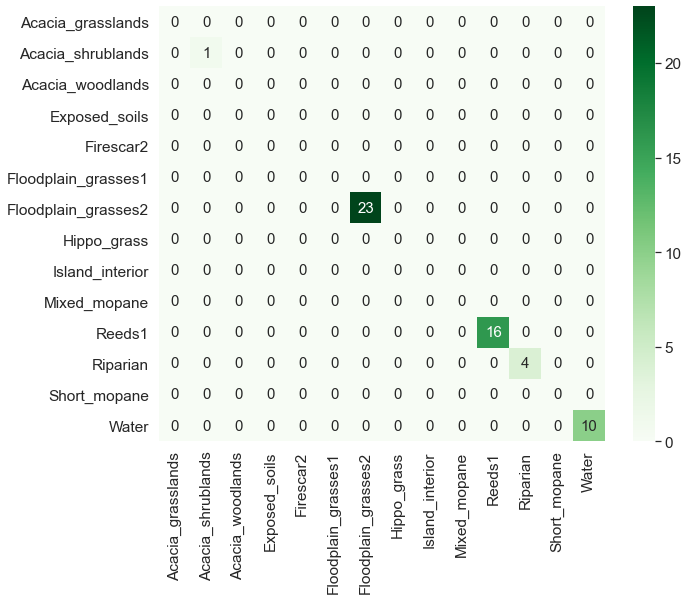

In [13]:
names = ['Water', 'Hippo_grass','Floodplain_grasses1', 'Floodplain_grasses2','Reeds1','Riparian','Firescar2','Island_interior' ,'Acacia_woodlands','Acacia_shrublands','Acacia_grasslands','Short_mopane','Mixed_mopane','Exposed_soils']

df_cm = pd.DataFrame(cm[1:15, 1:15] , columns=np.unique(names), index = np.unique(names))


plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 15}, fmt='d')

plt.savefig('cmap.png', dpi=30)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_Pred, Y_Test)

0.9923886348238482